Import Library Yang Diperlukan

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.metrics import adjusted_rand_score

%matplotlib inline

Membaca Dataset

In [2]:
data = pd.read_csv('data_cuaca.csv')

Menampilkan 5 Data Teratas

In [3]:
data.shape
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,9/10/2011 0:00,912.3,64.76,97.0,1.2,106.0,1.7,85.0,1.0,NaN,NaN,60.5
1,1,9/10/2011 0:01,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,9/10/2011 0:02,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,9/10/2011 0:03,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,9/10/2011 0:04,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


Melakukan Data Sampling

In [4]:
sampled_df = data[(data['rowID'] % 10) == 0]
sampled_df.shape

(99785, 13)

Statistik Data

In [ ]:
sampled_df.describe().transpose()

In [6]:
sampled_df[sampled_df['rain_accumulation'] == 0].shape

(99089, 13)

In [7]:
sampled_df[sampled_df['rain_duration'] == 0].shape

(98666, 13)

Hilangkan Semua Row Kosong rain_accumulation dan rain_duration

In [8]:
del sampled_df['rain_accumulation']
del sampled_df['rain_duration']

In [9]:
rows_before = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
rows_after = sampled_df.shape[0]

Row / Baris yang dihilangkan

In [10]:
rows_before - rows_after

26

In [11]:
sampled_df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

Pemilihan Fitur - Fitur Relevan Yang akan Diclustering

In [12]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
        'max_wind_speed','relative_humidity']

select_df = sampled_df[features]

select_df.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')

In [13]:
select_df

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.7,60.5
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4
...,...,...,...,...,...,...,...
997800,916.5,67.82,4.0,0.7,19.0,0.9,73.3
997810,916.4,67.28,1.0,1.4,9.0,1.5,75.0
997820,916.3,66.74,16.0,1.2,30.0,1.5,76.2
997830,916.3,65.12,36.0,1.5,38.0,1.6,78.8


Normalisasi Fitur

In [14]:
X = StandardScaler().fit_transform(select_df)
X

array([[-1.46275214,  0.3661234 , -0.67458456, ..., -0.61149599,
        -0.72283414,  0.42763991],
       [-1.46275214,  0.15672913, -0.18361432, ...,  0.0475247 ,
        -0.68091586, -0.40686536],
       [-1.49456315,  0.24646953, -0.64324604, ..., -0.43863811,
        -0.38748789,  0.34418939],
       ...,
       [-0.19031183,  0.53064747, -1.52072478, ..., -1.43257095,
        -0.8066707 ,  1.02317323],
       [-0.19031183,  0.39603687, -1.31180127, ..., -1.34614201,
        -0.76475242,  1.12179658],
       [-0.19031183,  0.3212532 , -1.22823186, ..., -1.20569498,
        -0.8066707 ,  1.23938596]])

K-Means Clustering

In [36]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print("model\n", model)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


model
 KMeans(n_clusters=12)


Center dari 12 Cluster Yang Terbentuk

In [16]:
centers = model.cluster_centers_
centers

array([[ 0.14405048, -0.79412703, -1.23119084, -0.55460952, -1.07748278,
        -0.56728076,  0.79004532],
       [-0.84456384, -0.3741919 ,  0.17937586, -0.6288698 ,  0.34946171,
        -0.63149357,  0.83932843],
       [-1.13632938, -0.67809394,  0.4759567 ,  1.99046732,  0.56639377,
         1.96646866,  0.74143317],
       [ 0.59319149, -0.97419613,  0.79700469, -0.44071312,  1.01348252,
        -0.41639101,  1.03381302],
       [ 0.16998727,  0.74966104,  1.43929628, -0.67145647,  1.70963783,
        -0.629256  , -0.74325687],
       [-0.18491212,  0.96196146, -1.29207453, -0.56655862, -1.14795801,
        -0.58200967, -0.68522631],
       [ 0.09611366,  0.76397772,  0.24227534, -0.64558063,  0.43089123,
        -0.65882182, -0.66619433],
       [-0.17754039,  0.62089367,  0.40911877,  0.63163274,  0.52111949,
         0.57275035, -0.19575186],
       [-0.76878039, -1.16487606,  0.38955045,  0.55551283,  0.50350107,
         0.5443376 ,  1.35986074],
       [ 1.40725733, -0.0672

Plots

In [17]:
#Membuat pandas DataFrame Untuk Cluster
def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Membuat Kolom 'Prediksi'(index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Mengonversi data ke dalam format pandas DataFrame agar dapat digunakan untuk membuat plot atau grafik.
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [18]:
# Fungsi untuk membuat parallel plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [19]:
P = pd_centers(features, centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,0.144050,-0.794127,-1.231191,-0.554610,-1.077483,-0.567281,0.790045,0
1,-0.844564,-0.374192,0.179376,-0.628870,0.349462,-0.631494,0.839328,1
2,-1.136329,-0.678094,0.475957,1.990467,0.566394,1.966469,0.741433,2
3,0.593191,-0.974196,0.797005,-0.440713,1.013483,-0.416391,1.033813,3
4,0.169987,0.749661,1.439296,-0.671456,1.709638,-0.629256,-0.743257,4
5,-0.184912,0.961961,-1.292075,-0.566559,-1.147958,-0.582010,-0.685226,5
6,0.096114,0.763978,0.242275,-0.645581,0.430891,-0.658822,-0.666194,6
7,-0.177540,0.620894,0.409119,0.631633,0.521119,0.572750,-0.195752,7
8,-0.768780,-1.164876,0.389550,0.555513,0.503501,0.544338,1.359861,8
9,1.407257,-0.067261,-1.131344,-0.151773,-0.994272,-0.138839,-0.990168,9


In [53]:
# Mendapatkan prediksi dari model clustering
labels = model.labels_

# Membaca label yang sebenarnya (ground truth) dari kolom 'actual_label'
actual_labels = sampled_df['air_temp'].values

# Menghitung Adjusted Rand Index
ari = adjusted_rand_score(actual_labels, labels)
print(f'Adjusted Rand Index: {ari}')

Adjusted Rand Index: 0.025263893344720692


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


Dry Days (Keadaan di mana tidak ada presipitasi air baik itu hujan, salju, dll)

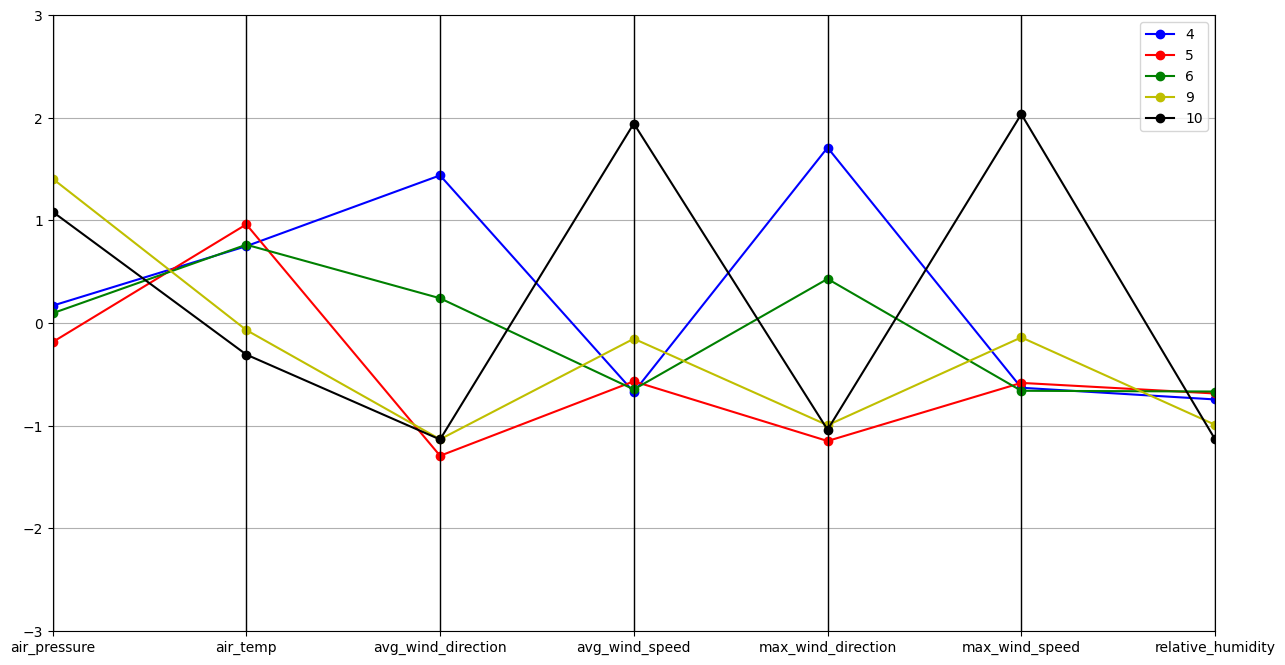

In [20]:
parallel_plot(P[P['relative_humidity'] < -0.5])

Warm Days (Suhu udara tinggi / hangat)

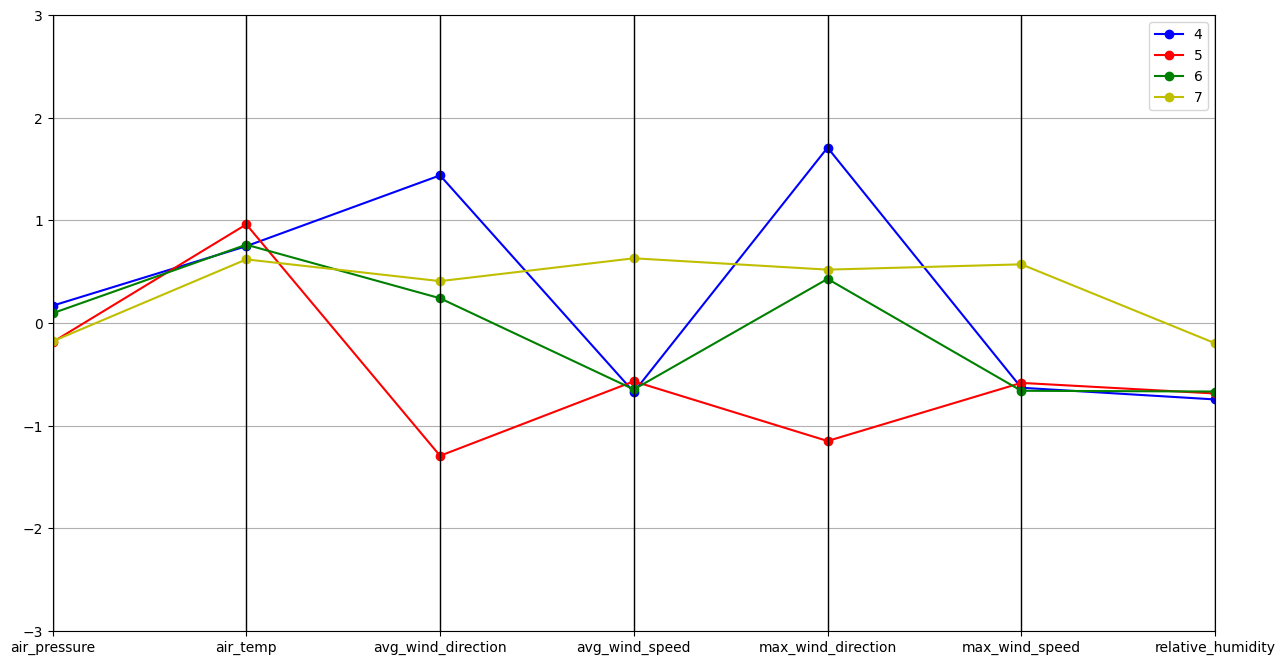

In [21]:
parallel_plot(P[P['air_temp'] > 0.5])

Cool Days (Suhu udara rendah / sejuk)

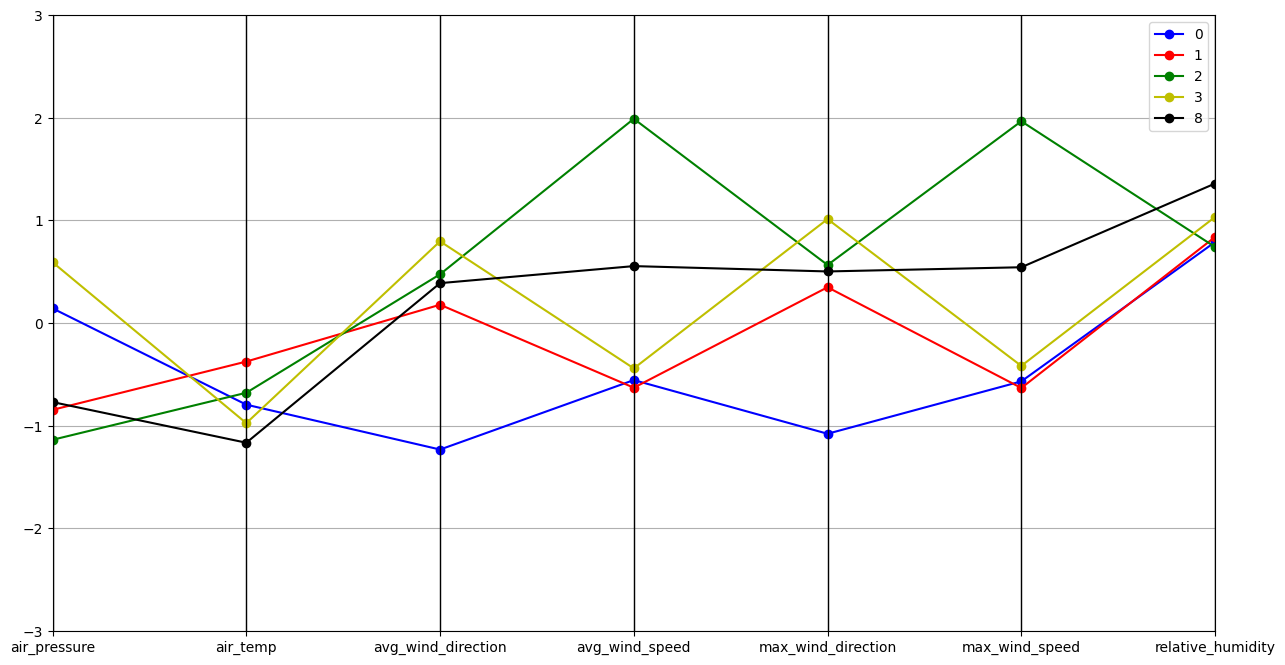

In [26]:
parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])